# インポート

In [2]:
# import numpy as np
# import lightgbm as lgb
import pandas as pd
from pathlib import Path
import create_population
import preprocessing
from feature_producing import FeatureCreator
from training import Trainer
from evaluationing import Evaluator
%load_ext autoreload


In [37]:
%autoreload

# 学習母集団の作成
    ・検証母集団:2023年の全レース
    ・学習母集団:以下を比較
        ・2022年の1年間
        ・2020~2022年の3年間
        ・2018~2022年の5年間

In [9]:
population = create_population.create(
    from_ ="2018-01-01",
    to_ = "2023-12-31",
    output_filename="population_5year.csv"
)

In [ ]:
# 各年の数を確認
population["date"].dt.year.value_counts().sort_index()

date
2018    48604
2019    47574
2020    48282
2021    47821
2022    47220
2023    47672
Name: count, dtype: int64

In [67]:
population["race_id"]

0        202301010101
1        202301010101
2        202301010101
3        202301010101
4        202301010101
             ...     
47667    202310030812
47668    202310030812
47669    202310030812
47670    202310030812
47671    202310030812
Name: race_id, Length: 47672, dtype: int64

In [68]:
population

,race_id,date,horse_id
0,202301010101,2023-07-22,2021101429
1,202301010101,2023-07-22,2021105872
2,202301010101,2023-07-22,2021106854
3,202301010101,2023-07-22,2021105553
4,202301010101,2023-07-22,2021100648
...,...,...,...
47667,202310030812,2023-09-03,2020105644
47668,202310030812,2023-09-03,2018106584
47669,202310030812,2023-09-03,2020101781
47670,202310030812,2023-09-03,2019106647


# データ加工

In [1]:
import preprocessing
%load_ext autoreload

SyntaxError: unexpected character after line continuation character (preprocessing.py, line 265)

In [38]:
%autoreload

In [ ]:
# レース結果テーブルの前処理

In [70]:
results = pd.read_csv(RAWDF_DIR / "results.csv", sep = "\t")
results["race_id"]

0        202301010101
1        202301010101
2        202301010101
3        202301010101
4        202301010101
             ...     
47746    202205010305
47747    202205010305
47748    202205010305
47749    202205010305
47750    202205010305
Name: race_id, Length: 47751, dtype: int64

In [48]:
# Ensure the data types are correctly set
results_preprocessd = results_preprocessd.astype({
	'race_id': 'int64',
	'horse_id': 'int64',
	'jockey_id': 'int64',
	'trainer_id': 'int64',
	'owner_id': 'int64',
	'rank': 'int32',
	'umaban': 'int32',
	'wakuban': 'int32',
	'tansyo_odds': 'float64',
	'popularity': 'int32',
	'kinryou': 'float64',
	'sex': 'int64',
	'age': 'int32',
	'weight': 'int32',
	'weight_diff': 'int32'
})

In [58]:
COMMON_DATA_DIR = Path("..","..","common","data")
RAWDF_DIR = COMMON_DATA_DIR/"rawdf"
input_dir: Path = RAWDF_DIR
results = pd.read_csv(input_dir / "results.csv", sep="\t")
# df = pd.read_csv(input_dir / "results.csv", sep="\t").query("race_id in @population['race_id']")
results["race_id"]

0        202301010101
1        202301010101
2        202301010101
3        202301010101
4        202301010101
             ...     
47746    202205010305
47747    202205010305
47748    202205010305
47749    202205010305
47750    202205010305
Name: race_id, Length: 47751, dtype: int64

In [ ]:
n_years_list = [1, 3, 5]

In [ ]:
#レース結果テーブルの前処理
for n_years in n_years_list:
    results_preprocessed = preprocessing.process_results(
        population_filename=f"population_{n_years}year.csv", 
        output_filename=f"results_preprocessed_{n_years}year.csv",
)

In [13]:
# 重複チェック
results_preprocessd.duplicated(subset=["race_id", "horse_id"]).sum()

np.int64(0)

In [76]:
# 欠損チェック
results_preprocessd.isnull().sum()

race_id        0
horse_id       0
jockey_id      0
trainer_id     0
owner_id       0
rank           0
umaban         0
wakuban        0
tansyo_odds    0
popularity     0
kinryou        0
sex            0
age            0
weight         0
weight_diff    0
dtype: int64

In [ ]:
# 馬の過去成績テーブルの前処理
n_years_list = [1, 3, 5]
for n in n_years_list:
    print(n)
    horse_results_process = preprocessing.process_horse_results(
        POPULATION_FILENAME=f"population_{n}year.csv",
        output_filename=f"horse_results_{n}year.csv"
    )


In [81]:
horse_results_preprocessd

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_condition,race_class,n_horses
0,2021101429,2024-11-09,9.0,0.0,0.2,0.0,1,1400,0.0,4.0,14
1,2021101429,2024-10-06,1.0,1140.0,0.0,1.0,1,1400,0.0,3.0,13
2,2021101429,2024-09-01,2.0,625.2,0.4,0.0,1,1400,0.0,5.0,7
3,2021101429,2024-08-10,2.0,629.2,0.0,0.0,1,1400,0.0,5.0,14
4,2021101429,2024-04-06,13.0,0.0,0.9,1.0,1,1600,1.0,7.0,16
...,...,...,...,...,...,...,...,...,...,...,...
213811,2019103076,2022-01-10,8.0,0.0,0.7,1.0,1,2000,0.0,1.0,17
213812,2019103076,2021-12-12,5.0,51.0,0.2,1.0,1,2000,0.0,1.0,17
213813,2019103076,2021-11-20,12.0,0.0,2.0,0.0,1,1200,0.0,1.0,16
213814,2019103076,2021-07-18,7.0,0.0,1.1,0.0,1,1200,0.0,1.0,12


In [82]:
horse_results_preprocessd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210604 entries, 0 to 213815
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   horse_id          210604 non-null  int64         
 1   date              210604 non-null  datetime64[ns]
 2   rank              210604 non-null  float64       
 3   prize             210604 non-null  float64       
 4   rank_diff         210344 non-null  float64       
 5   weather           210385 non-null  float64       
 6   race_type         210604 non-null  int64         
 7   course_len        210604 non-null  int32         
 8   ground_condition  210600 non-null  float64       
 9   race_class        150061 non-null  float64       
 10  n_horses          210604 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(3)
memory usage: 18.5 MB


In [83]:
# 欠損チェック
horse_results_preprocessd.isnull().sum()

horse_id                0
date                    0
rank                    0
prize                   0
rank_diff             260
weather               219
race_type               0
course_len              0
ground_condition        4
race_class          60543
n_horses                0
dtype: int64

In [8]:
%autoreload

In [27]:
n_years_list = [1, 3, 5]
for n in n_years_list:
    race_info_preprocess  = preprocessing.process_race_info(
        POPULATION_FILENAME=f"population_{n}year.csv",
        output_filename=f"race_info_{n}year.csv"
    )


In [ ]:
race_info_preprocess["date"].dt.year.value_counts().sort_index()

date
2018    3453
2019    3452
2020    3456
2021    3456
2022    3456
2023    3456
Name: count, dtype: int64

In [5]:
df = preprocessing.process_jockey_leading()
df

,page_id,jockey_id,順位,騎手名,所属,生年月日,1着,2着,3着,着外,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,2017_01,5339,1,Ｃ．ルメール,[西]フリー,1979/05/20,199,138,106,366,...,131,469,127,340,72,0.246,0.417,0.548,414622.0,レイデオロ
1,2017_01,5386,2,戸崎圭太,[東]田島俊明,1980/07/08,171,126,95,533,...,125,498,88,427,83,0.185,0.321,0.424,276555.6,ベストウォーリア
2,2017_01,5212,2,Ｍ．デムーロ,[西]フリー,1979/01/11,171,103,79,312,...,100,402,108,263,63,0.257,0.412,0.531,402361.4,サトノクラウン
3,2017_01,1014,4,福永祐一,[西]フリー,1976/12/09,116,85,81,458,...,88,422,73,318,43,0.157,0.272,0.381,203769.4,ケイティブレイブ
4,2017_01,1018,5,和田竜二,[西]フリー,1977/06/23,96,86,100,739,...,66,513,47,508,49,0.094,0.178,0.276,203060.6,モズカッチャン
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017_01,1124,45,国分恭介,[西]フリー,1990/12/27,23,21,29,386,...,17,190,12,269,11,0.050,0.096,0.159,38402.0,タガノアスワド
96,2017_01,1117,47,丸田恭介,[東]フリー,1986/05/20,22,34,34,446,...,16,303,12,233,10,0.041,0.104,0.168,48865.2,ライジングリーズン
97,2017_01,684,47,田中勝春,[東]フリー,1971/02/25,22,22,37,411,...,17,231,8,261,14,0.045,0.089,0.165,46128.6,アルタイル
98,2017_01,1153,47,木幡初也,[東]竹内正洋,1995/04/07,22,18,20,424,...,19,217,8,267,14,0.045,0.083,0.124,30409.3,トミケンシャルゴー


In [30]:
df.duplicated(subset=["jockey_id"]).sum()

np.int64(50)

In [6]:
df["n_race"] = df["1着"] + df["2着"] + df["3着"]
df


,page_id,jockey_id,順位,騎手名,所属,生年月日,1着,2着,3着,着外,...,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬,n_race
0,2017_01,5339,1,Ｃ．ルメール,[西]フリー,1979/05/20,199,138,106,366,...,469,127,340,72,0.246,0.417,0.548,414622.0,レイデオロ,443
1,2017_01,5386,2,戸崎圭太,[東]田島俊明,1980/07/08,171,126,95,533,...,498,88,427,83,0.185,0.321,0.424,276555.6,ベストウォーリア,392
2,2017_01,5212,2,Ｍ．デムーロ,[西]フリー,1979/01/11,171,103,79,312,...,402,108,263,63,0.257,0.412,0.531,402361.4,サトノクラウン,353
3,2017_01,1014,4,福永祐一,[西]フリー,1976/12/09,116,85,81,458,...,422,73,318,43,0.157,0.272,0.381,203769.4,ケイティブレイブ,282
4,2017_01,1018,5,和田竜二,[西]フリー,1977/06/23,96,86,100,739,...,513,47,508,49,0.094,0.178,0.276,203060.6,モズカッチャン,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017_01,1124,45,国分恭介,[西]フリー,1990/12/27,23,21,29,386,...,190,12,269,11,0.050,0.096,0.159,38402.0,タガノアスワド,73
96,2017_01,1117,47,丸田恭介,[東]フリー,1986/05/20,22,34,34,446,...,303,12,233,10,0.041,0.104,0.168,48865.2,ライジングリーズン,90
97,2017_01,684,47,田中勝春,[東]フリー,1971/02/25,22,22,37,411,...,231,8,261,14,0.045,0.089,0.165,46128.6,アルタイル,81
98,2017_01,1153,47,木幡初也,[東]竹内正洋,1995/04/07,22,18,20,424,...,217,8,267,14,0.045,0.083,0.124,30409.3,トミケンシャルゴー,60


<Axes: >

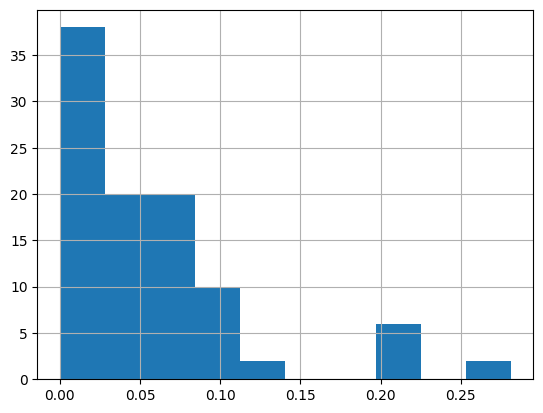

In [7]:
df["win_rate_grade"] = df["重賞_勝利"] / df["重賞_出走"]
df["win_rate_grade"].hist()

In [9]:
df["page_id"].str[:4].astype(int)

0     2017
1     2017
2     2017
3     2017
4     2017
      ... 
95    2017
96    2017
97    2017
98    2017
99    2017
Name: page_id, Length: 100, dtype: int64

## 各種リーディングの加工

In [31]:
jorckey_leading = preprocessing.process_jockey_leading()

In [32]:
jorckey_leading

,jockey_id,year,rank,n_races,n_races_graded,winrate_graded,n_races_special,winrate_special,n_races_ordinal,winrate_ordinal,n_races_turf,winrate_turf,n_races_dirt,winrate_dirt,winrate,placerate,showrate,prize
0,5339,2017,1,809,70,0.200000,211,0.255924,528,0.248106,469,0.270789,340,0.211765,0.246,0.417,0.548,414622.0
1,5386,2017,2,925,64,0.062500,248,0.169355,613,0.203915,498,0.176707,427,0.194379,0.185,0.321,0.424,276555.6
2,5212,2017,2,665,64,0.281250,200,0.265000,401,0.249377,402,0.268657,263,0.239544,0.257,0.412,0.531,402361.4
3,1014,2017,4,740,53,0.056604,195,0.128205,492,0.178862,422,0.172986,318,0.135220,0.157,0.272,0.381,203769.4
4,1018,2017,5,1021,51,0.058824,255,0.105882,715,0.092308,513,0.091618,508,0.096457,0.094,0.178,0.276,203060.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,5454,2024,160,1,1,0.000000,0,NaN,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3002,5478,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3003,5552,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3004,5579,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0


In [38]:
jorckey_leading["jockey_id"].duplicated().sum() 

np.int64(2631)

In [18]:
trainer_leading = preprocessing.process_trainer_leading()

In [19]:
trainer_leading

,trainer_id,year,rank,n_races,n_races_graded,winrate_graded,n_races_special,winrate_special,n_races_ordinal,winrate_ordinal,n_races_turf,winrate_turf,n_races_dirt,winrate_dirt,winrate,placerate,showrate,prize
0,1071,2017,1,345,58,0.172414,110,0.163636,177,0.197740,274,0.189781,64,0.156250,0.183,0.307,0.423,184736.6
1,1055,2017,2,312,35,0.000000,91,0.208791,186,0.193548,222,0.166667,83,0.204819,0.176,0.337,0.446,105225.8
2,1053,2017,3,348,56,0.071429,112,0.125000,180,0.200000,264,0.151515,75,0.160000,0.155,0.299,0.385,127664.9
3,399,2017,4,335,21,0.095238,113,0.097345,201,0.174129,254,0.141732,71,0.154930,0.143,0.248,0.346,88056.3
4,1070,2017,4,239,36,0.138889,81,0.148148,122,0.254098,163,0.190184,76,0.223684,0.201,0.297,0.385,113660.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,5775,2023,190,4,1,0.000000,3,0.000000,0,NaN,4,0.000000,0,NaN,0.000,0.000,0.000,0.0
3252,5776,2023,190,1,1,0.000000,0,NaN,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3253,5777,2023,190,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3254,5778,2023,190,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0


In [3]:
sire_leading = preprocessing.process_sire_leading()
sire_leading

category,page_id,sire_id,year,race_type,n_races,n_wins,course_len,winrate
0,2018_01,0,2018,0,335.923077,24.615385,1541.092308,0.073277
1,2018_01,0,2018,1,205.615385,14.692308,1567.092308,0.071455
2,2018_01,1994108729,2018,0,218.000000,15.000000,1793.300000,0.068807
3,2018_01,1994108729,2018,1,984.000000,85.000000,2022.400000,0.086382
4,2018_01,1994109686,2018,0,175.000000,9.000000,1222.200000,0.051429
...,...,...,...,...,...,...,...,...
2857,2023_09,2013109168,2023,1,0.000000,0.000000,0.000000,NaN
2858,2023_09,2014105108,2023,0,2.000000,0.000000,0.000000,0.000000
2859,2023_09,2014105108,2023,1,1.000000,0.000000,0.000000,0.000000
2860,2023_09,2014106077,2023,0,3.000000,0.000000,0.000000,0.000000


In [4]:
# 重複チェック
sire_leading["sire_id"].duplicated().sum() 

np.int64(2493)

In [ ]:
# 関数がなかったのでとりあえずスキップ
bms_leading = preprocessing.process_bms_leading()

AttributeError: module 'preprocessing' has no attribute 'process_bms_leading'

In [ ]:
# 重複チェック
bms_leading["bms_id"].duplicated().sum()

In [11]:
## 血統でーたの前処理
ped = preprocessing.process_peds(populaton_filename="population_5year.csv", output_filename="peds.csv")

In [12]:
ped

,horse_id,sire_id,bms_id
0,2006106754,1999106689,000a000013
1,2007100107,1999107004,1989109110
2,2007100828,000a00fa34,1977103827
3,2007106312,1990109700,000a00035e
4,2008100175,1999106756,000a001bda
...,...,...,...
108,2010103203,000a011099,1994109686
109,2010103225,2003102955,000a000d9d
110,2010103248,1992102988,000a0000df
111,2010103284,2001103890,000a00035c


In [13]:
# 重複チェック
ped["horse_id"].duplicated().sum()

np.int64(0)

# 特徴量作成

In [6]:
from feature_producing import FeatureCreator
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload

In [13]:
n_years_list = [1, 3, 5]

In [24]:
for n in n_years_list:
    feature_creator = FeatureCreator(
        poplation_filename=f"population_{n}year.csv",
        results_filename=f"results_{n}year.csv",
        horse_results_filename=f"horse_results_{n}year.csv",
        race_info_filename=f"race_info_{n}year.csv",
        output_filename=f"features_{n}year.csv"
    )
    features = feature_creator.create_features()
        

In [ ]:
fp = FeatureCreator(
    poplation_filename="population_5year.csv",
    results_filename="results_5year.csv",
    horse_results_filename="horse_results.csv",
    race_info_filename="race_info_5year.csv"
    )
features = fp.create_features()

agg_horse_n_races_relative:   0%|          | 0/5 [00:00<?, ?it/s]

running agg_jockey()...
running agg_trainer()...


agg_horse_per_course_len:   0%|          | 0/6 [00:00<?, ?it/s]

KeyError: "Columns not found: 'win', 'time', 'show'"

In [65]:
features

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,umaban,wakuban,tansyo_odds,...,trainer_n_races_ordinal_relative,trainer_winrate_ordinal_relative,trainer_n_races_turf_relative,trainer_winrate_turf_relative,trainer_n_races_dirt_relative,trainer_winrate_dirt_relative,trainer_winrate_relative,trainer_placerate_relative,trainer_showrate_relative,trainer_prize_relative
0,201801010101,2018-07-28,2016104880,5339,386,386,1,1,1,1.1,...,-1.685974,1.668507,1.255496,1.731266,-1.585492,1.306694,1.621231,1.772086,1.498110,1.936148
1,201801010101,2018-07-28,2016101840,5203,1148,1148,2,6,6,7.6,...,1.111034,0.186565,1.009612,0.206937,0.238420,0.505658,0.289002,0.035207,0.202538,-0.023312
2,201801010101,2018-07-28,2016105057,1127,1132,1132,3,3,3,8.3,...,0.085464,-0.025555,-0.242158,-0.079810,0.202657,0.526896,0.119830,0.199506,0.272840,-0.081080
3,201801010101,2018-07-28,2016103985,1085,434,434,4,4,4,46.7,...,-0.007769,-1.238270,-0.555101,-1.076889,0.274183,-1.508637,-1.296984,-1.138360,-1.494762,-0.796767
4,201801010101,2018-07-28,2016103821,1170,417,417,5,5,5,39.8,...,0.877950,-0.781692,-1.426869,-0.884949,1.418598,-0.678267,-0.768322,-0.704140,-0.621004,-0.709556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284763,202310030812,2023-09-03,2020105644,1037,1092,1092,8,1,1,62.8,...,0.637982,0.642620,0.093351,0.553046,0.817894,0.778641,0.693810,0.861246,0.856285,0.207988
284764,202310030812,2023-09-03,2018106584,1195,438,438,9,7,6,125.6,...,0.188843,0.056851,0.513430,1.071392,0.634686,0.482384,0.754361,0.372431,0.010234,1.672715
284765,202310030812,2023-09-03,2020101781,1018,1142,1142,10,2,2,9.8,...,-0.668605,-0.998387,-0.140026,-0.764008,-1.223570,-1.377632,-1.062160,-1.041642,-1.136027,-0.965433
284766,202310030812,2023-09-03,2019106647,1200,1032,1032,11,4,4,37.2,...,-0.893174,-0.906636,-1.291355,-1.405712,-0.281356,-0.567674,-0.941059,-0.954354,-0.985922,-1.125241


In [66]:
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

np.int64(0)

In [44]:
results = fp.results
results

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,umaban,wakuban,tansyo_odds,popularity,kinryou,sex,age,weight,weight_diff
0,202301010101,2021100648,1095,1128,1128,5,1,1,23.9,5,55.0,1,2,434,-10
1,202301010101,2021100159,1157,1186,1186,6,2,2,61.8,7,55.0,0,2,454,-6
2,202301010101,2021100265,1197,1192,1192,7,3,3,18.8,4,53.0,1,2,404,-2
3,202301010101,2021105553,5339,1160,1160,4,4,4,16.6,3,55.0,1,2,450,2
4,202301010101,2021101429,1170,1026,1026,1,5,5,1.2,1,55.0,0,2,452,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,1161,1,8,6,3.5,1,53.0,1,4,442,-2
47269,202310030812,2020103754,1116,1104,1104,6,9,7,15.2,8,55.0,0,3,468,0
47270,202310030812,2020100400,1193,1092,1092,4,10,7,23.1,9,50.0,1,3,458,6
47271,202310030812,2020103663,732,1092,1092,2,11,8,5.0,3,55.0,2,3,486,-6


In [56]:
jockey_df = fp.agg_jockey_df
jockey_df

jockey_rank_relative  jockey_n_races_relative  \
race_id      horse_id                                                    
202301010101 2021101429             -0.735911                 0.877885   
             2021105872              0.166520                -0.798908   
             2021106854              0.091317                -0.575031   
             2021105553             -0.660708                -0.058743   
             2021100648             -0.510303                 0.544354   
...                                       ...                      ...   
202310030812 2020105644              1.376583                -1.041141   
             2018106584              1.994137                -1.488140   
             2020101781             -0.648993                 1.370492   
             2019106647              0.610817                -1.131262   
             2020103324             -0.476078                 0.260203   

                         jockey_n_races_graded_relative  \
race_id      horse_id                                     
202301010101 2021101429                        0.995601   
             2021105872                       -0.237413   
             2021106854                        0.084243   
             2021105553                        0.888383   
             2021100648                       -0.076585   
...                                                 ...   
202310030812 2020105644                       -0.746917   
             2018106584                       -0.839233   
             2020101781                        1.284027   
             2019106647                       -0.839233   
             2020103324                       -0.654602   

                         jockey_winrate_graded_relative  \
race_id      horse_id                                     
202301010101 2021101429                       -0.607623   
             2021105872                        1.482600   
             2021106854                        0.440915   
             2021105553                        0.239681   
             2021100648                        0.022130   
...                                                 ...   
202310030812 2020105644                       -0.844782   
             2018106584                             NaN   
             2020101781                       -0.100964   
             2019106647                             NaN   
             2020103324                       -0.844782   

                         jockey_n_races_special_relative  \
race_id      horse_id                                      
202301010101 2021101429                         0.580491   
             2021105872                        -0.073555   
             2021106854                        -0.282294   
             2021105553                        -0.017892   
             2021100648                         0.844893   
...                                                  ...   
202310030812 2020105644                        -0.563978   
             2018106584                        -1.057869   
             2020101781                         1.459772   
             2019106647                        -1.045823   
             2020103324                        -0.551932   

                         jockey_winrate_special_relative  \
race_id      horse_id                                      
202301010101 2021101429                         1.129415   
             2021105872                        -0.068265   
             2021106854                        -0.264148   
             2021105553                         1.049523   
             2021100648                         0.201496   
...                                                  ...   
202310030812 2020105644                        -0.427122   
             2018106584                        -0.928977   
             2020101781                         0.216768   
             2019106647                        -0.928977   
             2020103324  

In [51]:
jorckey_leading = fp.jockey_leading
jorckey_leading

,jockey_id,year,rank,n_races,n_races_graded,winrate_graded,n_races_special,winrate_special,n_races_ordinal,winrate_ordinal,n_races_turf,winrate_turf,n_races_dirt,winrate_dirt,winrate,placerate,showrate,prize
0,5339,2017,1,809,70,0.200000,211,0.255924,528,0.248106,469,0.270789,340,0.211765,0.246,0.417,0.548,414622.0
1,5386,2017,2,925,64,0.062500,248,0.169355,613,0.203915,498,0.176707,427,0.194379,0.185,0.321,0.424,276555.6
2,5212,2017,2,665,64,0.281250,200,0.265000,401,0.249377,402,0.268657,263,0.239544,0.257,0.412,0.531,402361.4
3,1014,2017,4,740,53,0.056604,195,0.128205,492,0.178862,422,0.172986,318,0.135220,0.157,0.272,0.381,203769.4
4,1018,2017,5,1021,51,0.058824,255,0.105882,715,0.092308,513,0.091618,508,0.096457,0.094,0.178,0.276,203060.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,5454,2024,160,1,1,0.000000,0,NaN,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3002,5478,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3003,5552,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0
3004,5579,2024,160,1,0,NaN,1,0.000000,0,NaN,1,0.000000,0,NaN,0.000,0.000,0.000,0.0


In [59]:
jockey_df.duplicated(subset=["race_id"]).sum()

KeyError: Index(['race_id'], dtype='object')

In [25]:
list(features.filter(like="jockey_").columns)

['jockey_id',
 'jockey_rank_relative',
 'jockey_n_races_relative',
 'jockey_n_races_graded_relative',
 'jockey_winrate_graded_relative',
 'jockey_n_races_special_relative',
 'jockey_winrate_special_relative',
 'jockey_n_races_ordinal_relative',
 'jockey_winrate_ordinal_relative',
 'jockey_n_races_turf_relative',
 'jockey_winrate_turf_relative',
 'jockey_n_races_dirt_relative',
 'jockey_winrate_dirt_relative',
 'jockey_winrate_relative',
 'jockey_placerate_relative',
 'jockey_showrate_relative',
 'jockey_prize_relative']

# 学習

In [67]:
%autoreload

In [69]:
trainer = Trainer(config_filepath="config.yaml")
evaluation_df = trainer.run(
    valid_start_date="2022-10-01",
    test_start_date="2023-01-01",
    importance_filename="importance_new.csv",
    evaluation_filename="evaluation_new.csv"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.211399
[200]	valid_0's binary_logloss: 0.201445
[300]	valid_0's binary_logloss: 0.197285
[400]	valid_0's binary_logloss: 0.194311
[500]	valid_0's binary_logloss: 0.191634
[600]	valid_0's binary_logloss: 0.189481
[700]	valid_0's binary_logloss: 0.187531
[800]	valid_0's binary_logloss: 0.185831
[900]	valid_0's binary_logloss: 0.184153
[1000]	valid_0's binary_logloss: 0.182459
[1100]	valid_0's binary_logloss: 0.180835
[1200]	valid_0's binary_logloss: 0.179171
[1300]	valid_0's binary_logloss: 0.177608
[1400]	valid_0's binary_logloss: 0.176091
[1500]	valid_0's binary_logloss: 0.174702
[1600]	valid_0's binary_logloss: 0.173202
[1700]	valid_0's binary_logloss: 0.171836
[1800]	valid_0's binary_logloss: 0.170429
[1900]	valid_0's binary_logloss: 0.168959
[2000]	valid_0's binary_logloss: 0.167339
[2100]	valid_0's binary_logloss: 0.16587
[2200]	valid_0's binary_logloss: 0.164532
[2300]	valid_0's binary_

In [ ]:
for n in n_years_list:
    print(n)
    trainer = Trainer(features_filename=f"features_{n}year.csv",)
    evaluation_df = trainer.run(
        
        test_start_date="2023-01-01",
        model_filename=f"model_{n}year.pkl",
        evaluation_filename=f"evaluation_{n}year.csv"
    )


1
[100]	training's binary_logloss: 0.161505	valid_1's binary_logloss: 0.210218
3
[100]	training's binary_logloss: 0.189099	valid_1's binary_logloss: 0.206979
5
[100]	training's binary_logloss: 0.194671	valid_1's binary_logloss: 0.206691


# 精度評価

In [41]:
from evaluationing import Evaluator
import pandas as pd
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload

In [ ]:
evaluator = Evaluator()

In [ ]:
# 1年間の学習結果の評価
evaluator = Evaluator(evaluation_filename="evaluation_1year.csv")
evals_1year = pd.concat([
    evaluator.summarize_box_top_n(n=1, exp_name="1year"),
    evaluator.summarize_box_top_n(n=2, exp_name="1year"),
    evaluator.summarize_box_top_n(n=3, exp_name="1year"),
]).set_index(["topn","bet_type"])
evals_1year

hitrate_pop  returnrate_pop  hitrate_1year  returnrate_1year
topn bet_type                                                              
1    単勝           0.331597        0.795833       0.337095          0.825145
     複勝           0.639468        0.843605       0.642650          0.856655
2    ワイド          0.307002        0.778096       0.300637          0.787095
     単勝           0.528646        0.799552       0.532986          0.828545
     複勝           0.845775        0.835446       0.849537          0.846499
     馬単           0.150752        0.731091       0.146412          0.743417
     馬連           0.150752        0.761227       0.146412          0.767882
3    ワイド          0.548611        0.792438       0.541377          0.801350
     三連単          0.088542        0.658415       0.086806          0.666387
     三連複          0.088542        0.778414       0.086806          0.777894
     単勝           0.652778        0.779630       0.652488          0.790326
     複勝           0.932292        0.824971       0.934028          0.832581
     馬単           0.316262        0.744806       0.309896          0.741676
     馬連           0.316262        0.774846       0.309896          0.769473

In [ ]:
# 3年間の学習結果の評価
evaluator = Evaluator(evaluation_filename="evaluation_3year.csv")
evals_3year = pd.concat([
    evaluator.summarize_box_top_n(n=1, exp_name="3year"),
    evaluator.summarize_box_top_n(n=2, exp_name="3year"),
    evaluator.summarize_box_top_n(n=3, exp_name="3year"),
]).set_index(["topn","bet_type"])
evals_3year

hitrate_pop  returnrate_pop  hitrate_3year  returnrate_3year
topn bet_type                                                              
1    単勝           0.331597        0.795833       0.328993          0.814410
     複勝           0.639468        0.843605       0.636285          0.851447
2    ワイド          0.307002        0.778096       0.296296          0.797106
     単勝           0.528646        0.799552       0.519965          0.802025
     複勝           0.845775        0.835446       0.840856          0.838773
     馬単           0.150752        0.731091       0.139178          0.727214
     馬連           0.150752        0.761227       0.139178          0.755874
3    ワイド          0.548611        0.792438       0.541088          0.822917
     三連単          0.088542        0.658415       0.089410          0.744840
     三連複          0.088542        0.778414       0.089410          0.864381
     単勝           0.652778        0.779630       0.652199          0.812741
     複勝           0.932292        0.824971       0.927662          0.833999
     馬単           0.316262        0.744806       0.305845          0.768697
     馬連           0.316262        0.774846       0.305845          0.794223

In [ ]:
# 5年間の学習結果の評価
evaluator = Evaluator(evaluation_filename="evaluation_5year.csv")
evals_5year = pd.concat([
    evaluator.summarize_box_top_n(n=1, exp_name="5year"),
    evaluator.summarize_box_top_n(n=2, exp_name="5year"),
    evaluator.summarize_box_top_n(n=3, exp_name="5year"),
]).set_index(["topn","bet_type"])
evals_5year

hitrate_pop  returnrate_pop  hitrate_5year  returnrate_5year
topn bet_type                                                              
1    単勝           0.331597        0.795833       0.337095          0.825145
     複勝           0.639468        0.843605       0.642650          0.856655
2    ワイド          0.307002        0.778096       0.300637          0.787095
     単勝           0.528646        0.799552       0.532986          0.828545
     複勝           0.845775        0.835446       0.849537          0.846499
     馬単           0.150752        0.731091       0.146412          0.743417
     馬連           0.150752        0.761227       0.146412          0.767882
3    ワイド          0.548611        0.792438       0.541377          0.801350
     三連単          0.088542        0.658415       0.086806          0.666387
     三連複          0.088542        0.778414       0.086806          0.777894
     単勝           0.652778        0.779630       0.652488          0.790326
     複勝           0.932292        0.824971       0.934028          0.832581
     馬単           0.316262        0.744806       0.309896          0.741676
     馬連           0.316262        0.774846       0.309896          0.769473

In [77]:
evals = pd.concat([evals_1year, evals_3year, evals_5year],axis=1).sort_index(axis=1)
evals

hitrate_1year  hitrate_3year  hitrate_5year  hitrate_pop  \
topn bet_type                                                             
1    単勝             0.337095       0.328993       0.337095     0.331597   
     複勝             0.642650       0.636285       0.642650     0.639468   
2    ワイド            0.300637       0.296296       0.300637     0.307002   
     単勝             0.532986       0.519965       0.532986     0.528646   
     複勝             0.849537       0.840856       0.849537     0.845775   
     馬単             0.146412       0.139178       0.146412     0.150752   
     馬連             0.146412       0.139178       0.146412     0.150752   
3    ワイド            0.541377       0.541088       0.541377     0.548611   
     三連単            0.086806       0.089410       0.086806     0.088542   
     三連複            0.086806       0.089410       0.086806     0.088542   
     単勝             0.652488       0.652199       0.652488     0.652778   
     複勝             0.934028       0.927662       0.934028     0.932292   
     馬単             0.309896       0.305845       0.309896     0.316262   
     馬連             0.309896       0.305845       0.309896     0.316262   

               hitrate_pop  hitrate_pop  returnrate_1year  returnrate_3year  \
topn bet_type                                                                 
1    単勝           0.331597     0.331597          0.825145          0.814410   
     複勝           0.639468     0.639468          0.856655          0.851447   
2    ワイド          0.307002     0.307002          0.787095          0.797106   
     単勝           0.528646     0.528646          0.828545          0.802025   
     複勝           0.845775     0.845775          0.846499          0.838773   
     馬単           0.150752     0.150752          0.743417          0.727214   
     馬連           0.150752     0.150752          0.767882          0.755874   
3    ワイド          0.548611     0.548611          0.801350          0.822917   
     三連単          0.088542     0.088542          0.666387          0.744840   
     三連複          0.088542     0.088542          0.777894          0.864381   
     単勝           0.652778     0.652778          0.790326          0.812741   
     複勝           0.932292     0.932292          0.832581          0.833999   
     馬単           0.316262     0.316262          0.741676          0.768697   
     馬連           0.316262     0.316262          0.769473          0.794223   

               returnrate_5year  returnrate_pop  returnrate_pop  \
topn bet_type                                                     
1    単勝                0.825145        0.795833        0.795833   
     複勝                0.856655        0.843605        0.843605   
2    ワイド               0.787095        0.778096        0.778096   
     単勝                0.828545        0.799552        0.799552   
     複勝                0.846499        0.835446        0.835446   
     馬単                0.743417        0.731091        0.731091   
     馬連                0.767882        0.761227        0.761227   
3    ワイド               0.801350        0.792438        0.792438   
     三連単               0.666387        0.658415        0.658415   
     三連複               0.777894        0.778414        0.778414   
     単勝                0.790326        0.779630        0.779630   
     複勝                0.832581        0.824971        0.824971   
     馬単                0.741676        0.744806        0.744806   
     馬連                0.769473        0.774846        0.774846   

               returnrate_pop  
topn bet_type                  
1    単勝              0.795833  
     複勝              0.843605  
2    ワイド             0.778096  
     単勝              0.799552  
     複勝              0.835446  
     馬単              0.731091  
     馬連              0.761227  
3    ワイド             0.792438  
     三連単             0.658415  
     三連複             0.778414  
     単勝              0.779630  
     複勝              0.824971  
     馬単              0.74480

## 特徴量追加後の評価

In [6]:
evaluator = Evaluator(evaluation_filename="evaluation_5year.csv")
summary_baseline = evaluator.summarize_box_exp(exp_name="baseline")
summary_baseline

,topn,bet_type,hitrate_baseline,returnrate_baseline
0,1,単勝,0.337095,0.825145
1,1,複勝,0.642650,0.856655
0,2,ワイド,0.300637,0.787095
1,2,単勝,0.532986,0.828545
2,2,複勝,0.849537,0.846499
3,2,馬単,0.146412,0.743417
4,2,馬連,0.146412,0.767882
0,3,ワイド,0.541377,0.801350
1,3,三連単,0.086806,0.666387
2,3,三連複,0.086806,0.777894


In [7]:
evaluator = Evaluator(evaluation_filename="evaluation_new.csv")
summmary_new = evaluator.summarize_box_exp(exp_name="new")
summmary_new

,topn,bet_type,hitrate_new,returnrate_new
0,1,単勝,0.332176,0.808044
1,1,複勝,0.633102,0.846470
0,2,ワイド,0.300637,0.790075
1,2,単勝,0.524595,0.811010
2,2,複勝,0.842303,0.840697
3,2,馬単,0.146701,0.744329
4,2,馬連,0.146701,0.774334
0,3,ワイド,0.541956,0.853009
1,3,三連単,0.088252,0.814733
2,3,三連複,0.088252,1.046672


In [11]:
summary = summary_baseline.merge(
    summmary_new, on=["topn", "bet_type"]
).iloc[:, [0, 1, 2, 4,3,5]]
summary

,topn,bet_type,hitrate_baseline,hitrate_new,returnrate_baseline,returnrate_new
0,1,単勝,0.337095,0.332176,0.825145,0.808044
1,1,複勝,0.642650,0.633102,0.856655,0.846470
2,2,ワイド,0.300637,0.300637,0.787095,0.790075
3,2,単勝,0.532986,0.524595,0.828545,0.811010
4,2,複勝,0.849537,0.842303,0.846499,0.840697
5,2,馬単,0.146412,0.146701,0.743417,0.744329
6,2,馬連,0.146412,0.146701,0.767882,0.774334
7,3,ワイド,0.541377,0.541956,0.801350,0.853009
8,3,三連単,0.086806,0.088252,0.666387,0.814733
9,3,三連複,0.086806,0.088252,0.777894,1.046672


In [13]:
summary.to_csv("../data/04_evaluation/summary.csv", index=False, sep="\t")